In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from IPython.display import clear_output
import random
import math
import re
from sklearn.impute import SimpleImputer
import plotly.express as px

#importing dataset
test_df = pd.read_csv('/Users/hannahkim/Desktop/WiDS/data/test_data.csv')
train_df = pd.read_csv('/Users/hannahkim/Desktop/WiDS/data/train_data.csv')
target = 'contest-tmp2m-14d__tmp2m'

train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [10]:
print(test_df['startdate'].to_string(index=False))

 11/1/22
 11/2/22
 11/3/22
 11/4/22
 11/5/22
 11/6/22
 11/7/22
 11/8/22
 11/9/22
11/10/22
11/11/22
11/12/22
11/13/22
11/14/22
11/15/22
11/16/22
11/17/22
11/18/22
11/19/22
11/20/22
11/21/22
11/22/22
11/23/22
11/24/22
11/25/22
11/26/22
11/27/22
11/28/22
11/29/22
11/30/22
 12/1/22
 12/2/22
 12/3/22
 12/4/22
 12/5/22
 12/6/22
 12/7/22
 12/8/22
 12/9/22
12/10/22
12/11/22
12/12/22
12/13/22
12/14/22
12/15/22
12/16/22
12/17/22
12/18/22
12/19/22
12/20/22
12/21/22
12/22/22
12/23/22
12/24/22
12/25/22
12/26/22
12/27/22
12/28/22
12/29/22
12/30/22
12/31/22
 11/1/22
 11/2/22
 11/3/22
 11/4/22
 11/5/22
 11/6/22
 11/7/22
 11/8/22
 11/9/22
11/10/22
11/11/22
11/12/22
11/13/22
11/14/22
11/15/22
11/16/22
11/17/22
11/18/22
11/19/22
11/20/22
11/21/22
11/22/22
11/23/22
11/24/22
11/25/22
11/26/22
11/27/22
11/28/22
11/29/22
11/30/22
 12/1/22
 12/2/22
 12/3/22
 12/4/22
 12/5/22
 12/6/22
 12/7/22
 12/8/22
 12/9/22
12/10/22
12/11/22
12/12/22
12/13/22
12/14/22
12/15/22
12/16/22
12/17/22
12/18/22
12/19/22
12/20/22
1

## All Column Names

In [2]:
for col in train_df.columns:
    print(col)

index
lat
lon
startdate
contest-pevpr-sfc-gauss-14d__pevpr
nmme0-tmp2m-34w__cancm30
nmme0-tmp2m-34w__cancm40
nmme0-tmp2m-34w__ccsm30
nmme0-tmp2m-34w__ccsm40
nmme0-tmp2m-34w__cfsv20
nmme0-tmp2m-34w__gfdlflora0
nmme0-tmp2m-34w__gfdlflorb0
nmme0-tmp2m-34w__gfdl0
nmme0-tmp2m-34w__nasa0
nmme0-tmp2m-34w__nmme0mean
contest-wind-h10-14d__wind-hgt-10
nmme-tmp2m-56w__cancm3
nmme-tmp2m-56w__cancm4
nmme-tmp2m-56w__ccsm3
nmme-tmp2m-56w__ccsm4
nmme-tmp2m-56w__cfsv2
nmme-tmp2m-56w__gfdl
nmme-tmp2m-56w__gfdlflora
nmme-tmp2m-56w__gfdlflorb
nmme-tmp2m-56w__nasa
nmme-tmp2m-56w__nmmemean
contest-rhum-sig995-14d__rhum
nmme-prate-34w__cancm3
nmme-prate-34w__cancm4
nmme-prate-34w__ccsm3
nmme-prate-34w__ccsm4
nmme-prate-34w__cfsv2
nmme-prate-34w__gfdl
nmme-prate-34w__gfdlflora
nmme-prate-34w__gfdlflorb
nmme-prate-34w__nasa
nmme-prate-34w__nmmemean
contest-wind-h100-14d__wind-hgt-100
nmme0-prate-56w__cancm30
nmme0-prate-56w__cancm40
nmme0-prate-56w__ccsm30
nmme0-prate-56w__ccsm40
nmme0-prate-56w__cfsv20
nmme0-

## Data type cleaning

In [3]:
# train_df['startdate'].dtypes 
# dtype('O') 
# string datatype
train_df['startdate'] = pd.to_datetime(train_df['startdate'])
train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


## Histogram

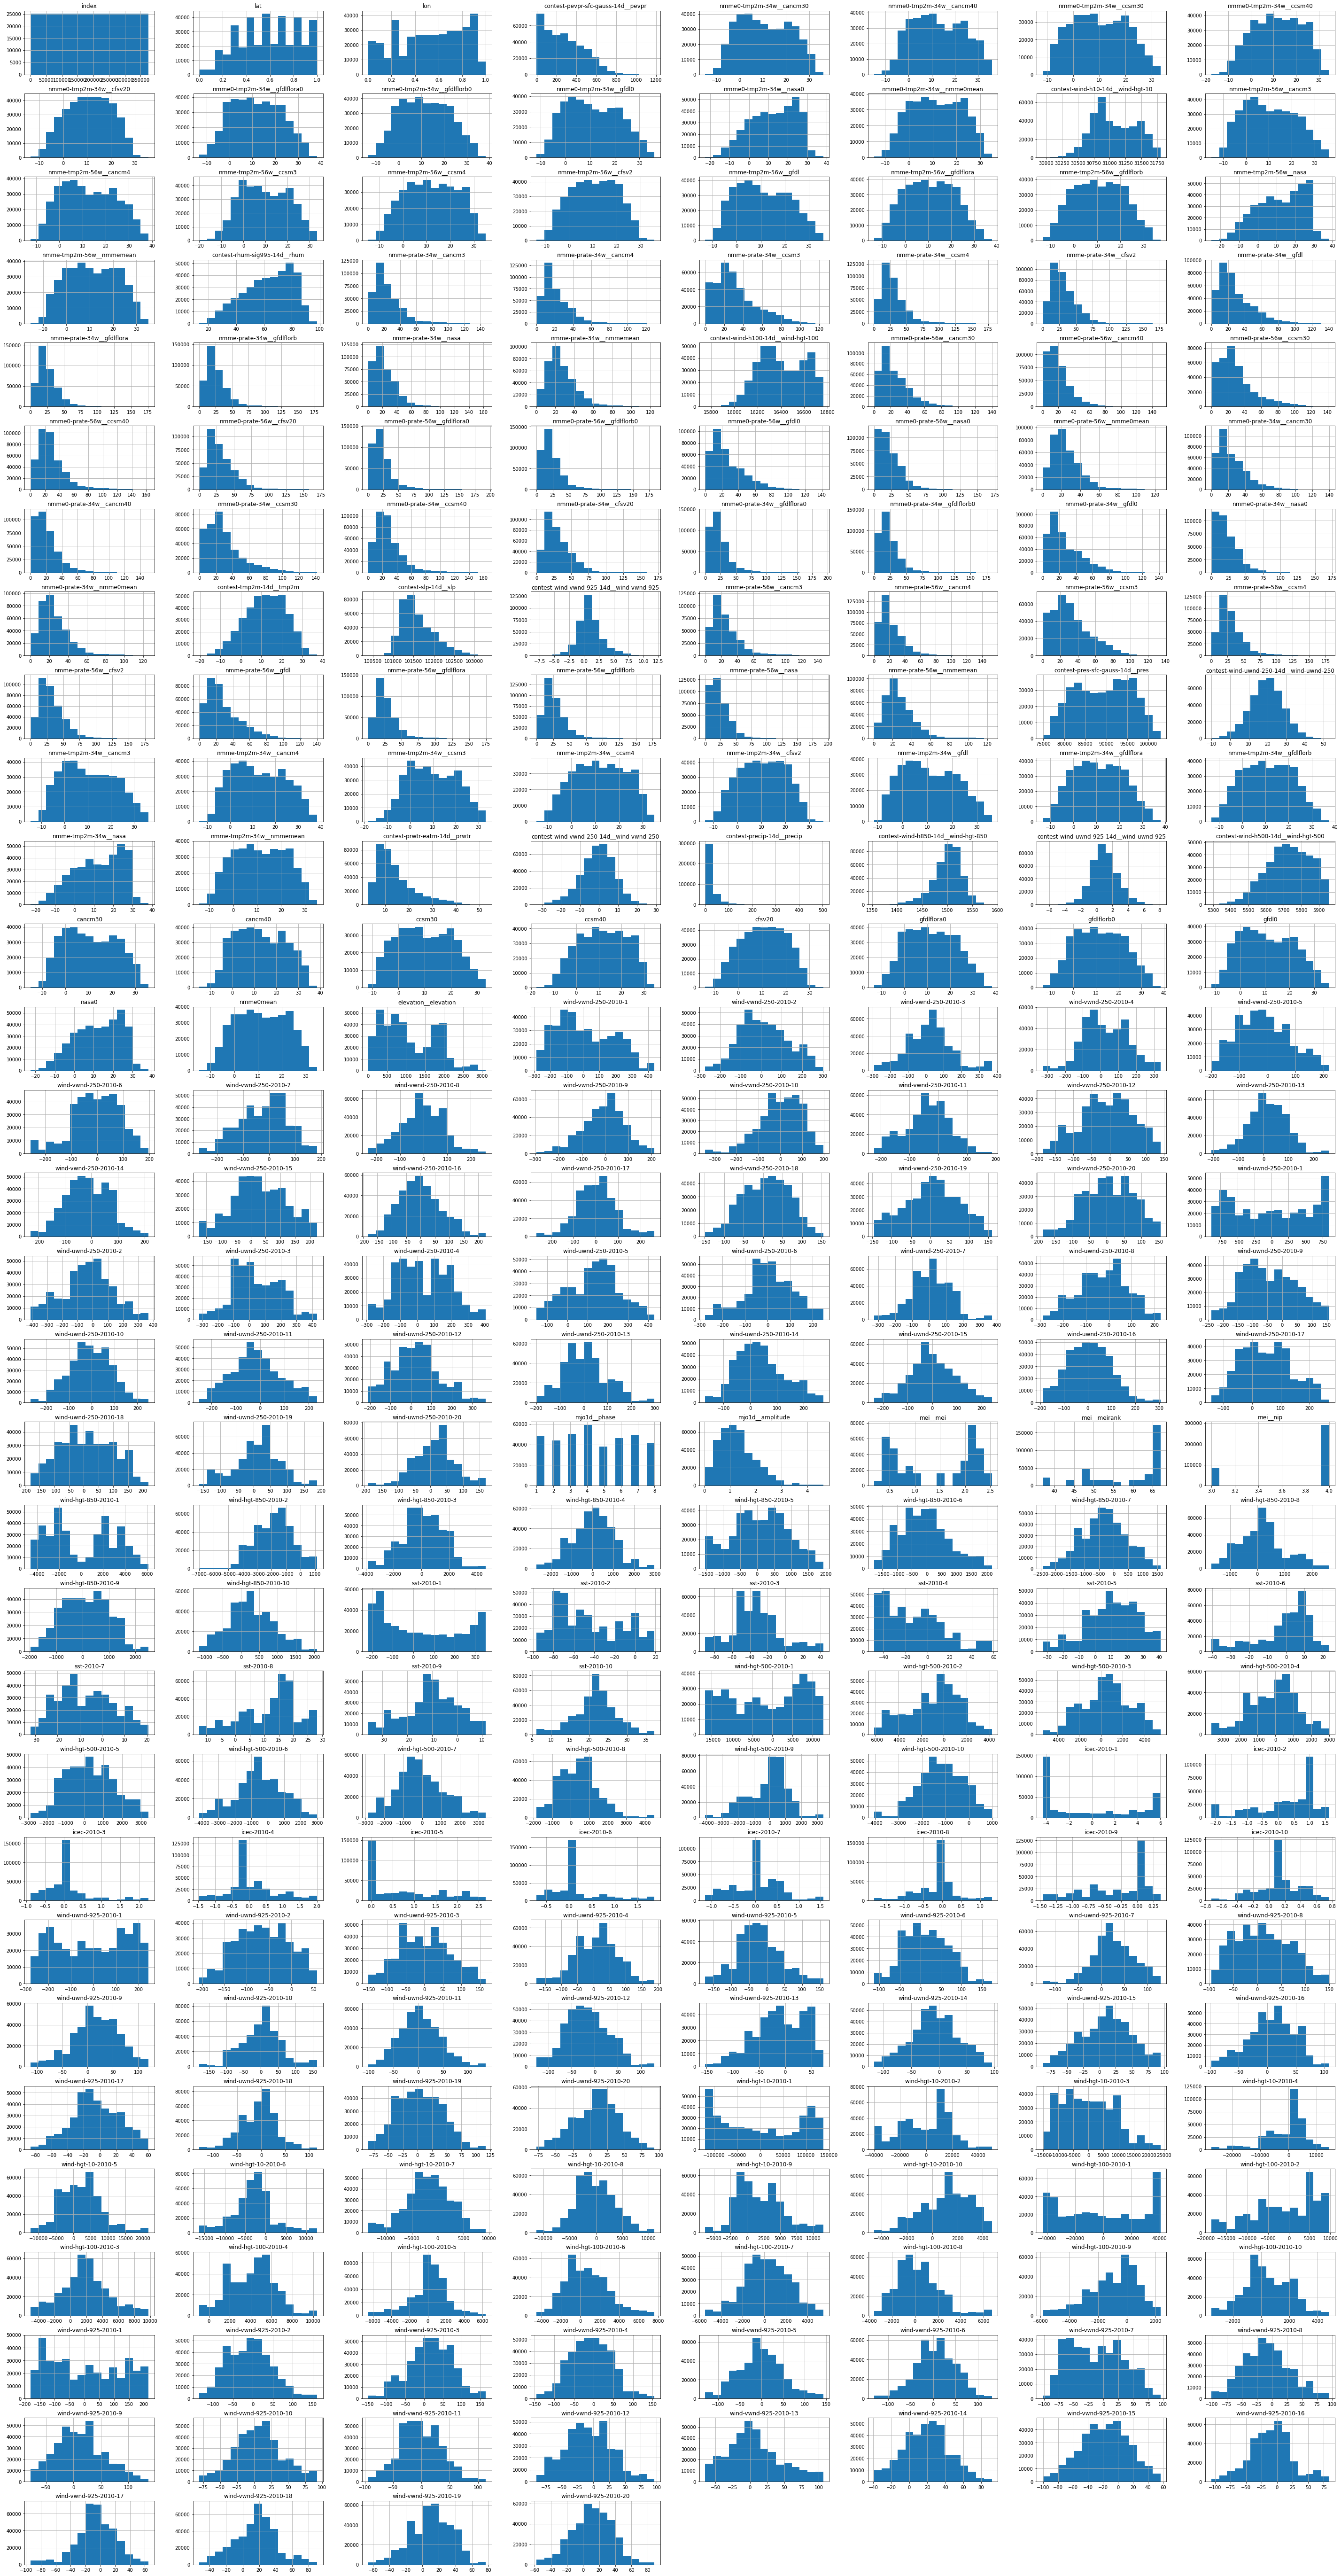

In [17]:
#distribution of all the variables in the dataset
train_df.hist(bins=15,figsize=(50, 100), layout=(31, 8))
plt.show()

## Checking & Imputing Missing Values

In [4]:
def check_null_index(df):
    null_check_df = df.isnull().any()
    non_null_index_list = list((null_check_df[null_check_df==False]).index)
    null_index_list = list((null_check_df[null_check_df==True]).index)
    # print(non_null_index_list)
    print(null_index_list)
    
    return null_index_list

In [5]:
train_null_col = check_null_index(train_df)

['nmme0-tmp2m-34w__ccsm30', 'nmme-tmp2m-56w__ccsm3', 'nmme-prate-34w__ccsm3', 'nmme0-prate-56w__ccsm30', 'nmme0-prate-34w__ccsm30', 'nmme-prate-56w__ccsm3', 'nmme-tmp2m-34w__ccsm3', 'ccsm30']


In [6]:
test_null_col = check_null_index(test_df)

[]


In [7]:
def impute_number_col(train_df):
    null_col = ['nmme0-tmp2m-34w__ccsm30', 'nmme-tmp2m-56w__ccsm3', 'nmme-prate-34w__ccsm3', 'nmme0-prate-56w__ccsm30', 'nmme0-prate-34w__ccsm30', 'nmme-prate-56w__ccsm3', 'nmme-tmp2m-34w__ccsm3', 'ccsm30']

    number_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    fixed_column_df = number_imputer.fit_transform(train_df[null_col])
    train_df[null_col] = fixed_column_df

    return train_df

nonnull_train_df = impute_number_col(train_df)
nonnull_train_df = nonnull_train_df.drop(columns="index")

display(nonnull_train_df)

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,1.0,0.866667,2016-08-27,312.05,23.13,27.20,20.25,24.43,18.35,23.35,...,-15.64,-75.68,-3.09,6.93,-16.69,16.98,-13.85,50.25,-31.33,0.77
375730,1.0,0.866667,2016-08-28,305.82,23.13,27.20,20.25,24.43,18.35,23.35,...,-7.59,-76.42,-13.55,13.36,-15.96,20.45,-16.36,51.65,-30.73,10.10
375731,1.0,0.866667,2016-08-29,311.62,23.13,27.20,20.25,24.43,18.35,23.35,...,-6.25,-70.65,-23.93,22.62,-16.71,20.28,-15.48,48.58,-18.74,9.28
375732,1.0,0.866667,2016-08-30,304.54,23.13,27.20,20.25,24.43,18.35,23.35,...,-7.16,-57.67,-33.55,32.06,-16.07,16.60,-20.61,39.23,-16.26,-0.22


In [ ]:
#distribution of just the target 
target_df = train_df['contest-tmp2m-14d__tmp2m']
target_df.describe()

count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

## Plots

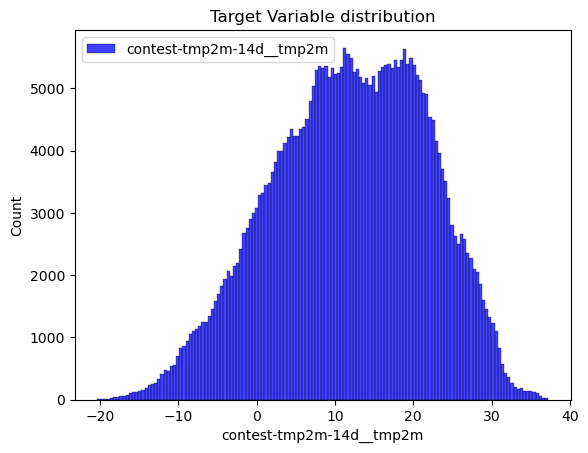

In [4]:
def target_var_visualized():
  plt.figure(figsize=(15,7))
  plt.subplot(121)
  sns.kdeplot(train_df['contest-tmp2m-14d__tmp2m'], color = "#ffd514")
  plt.subplot(122)
  sns.boxplot(data=train_df['contest-tmp2m-14d__tmp2m'], color = "#ff355d")
# target_var_visualized()

def histogram_plot(data, label, title):
    sns.histplot(data, color='blue', label=label)
    plt.legend()
    plt.title(title)
    plt.show()
histogram_plot(data=train_df['contest-tmp2m-14d__tmp2m'], label="contest-tmp2m-14d__tmp2m", title="Target Variable distribution")

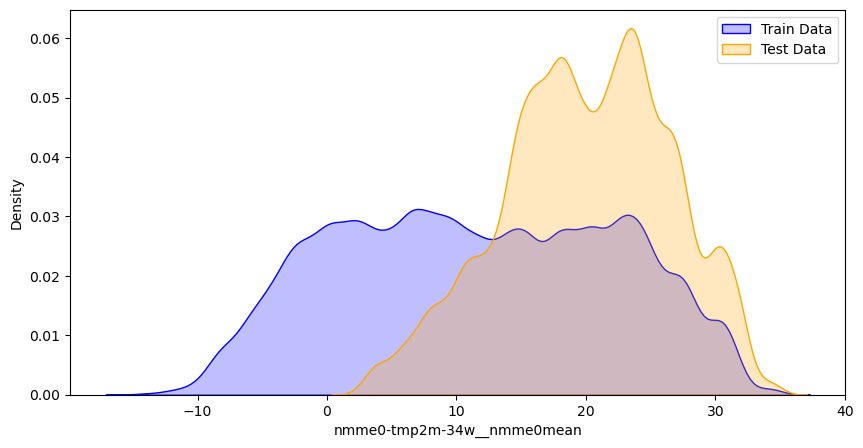

In [6]:
def train_test_dist(train, test):
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.kdeplot(data=train,  color='blue', fill=True, ax=ax, label="Train Data")
    sns.kdeplot(data=test, color='orange', fill=True, ax=ax, label="Test Data")
    plt.legend()
    plt.show()
    
#train_target = train_df['contest-tmp2m-14d__tmp2m']
#test_target = train_df['contest-tmp2m-14d__tmp2m']
train_target = train_df['nmme0-tmp2m-34w__nmme0mean']
test_target = test_df['nmme0-tmp2m-34w__nmme0mean']
train_test_dist(train_target, test_target)

In [ ]:
train_target = train_df['nmme0-tmp2m-34w__nmme0mean']
test_target = test_df['nmme0-tmp2m-34w__nmme0mean']
train_test_dist(train_target, test_target)